In [179]:
import pandas as pd
from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [192]:
def mpg_avg(df):
    df["avg_mpg"] = (df.cty + df.hwy) / 2
    return df
df_mpg = mpg_avg(mpg)
df.head()
# df = mpg.pipe(func_A).pipe(func_B)...
# use .pipe to create a data prep pipeline
# work from left to right

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_app,avg_mpg
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,l5),23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,m5),25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,m6),25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,av),25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,l5),21.0


In [177]:
extract = mpg.groupby(mpg.manufacturer).hwy.agg('mean') + mpg.groupby(mpg.manufacturer).cty.agg('mean')
avg_hwy_cty = extract / 2
print("The manufacturer producing the best mpg car is: {}".format(avg_hwy_cty.idxmax()))

The manufacturer producing the best mpg car is: honda


In [14]:
indexNamesArr = extract.index.values
indexNamesArr

array(['honda', 'volkswagen', 'hyundai', 'audi', 'pontiac', 'subaru',
       'toyota', 'nissan', 'chevrolet', 'ford', 'mercury', 'dodge',
       'jeep', 'lincoln', 'land rover'], dtype=object)

In [15]:
print("The manufacturer producing the best mpg car is: {}".format(indexNamesArr[0]))

The manufacturer producing the best mpg car is: honda


In [7]:
# How many different manufacturers are there?
print("There are {} manufacturers in the dataset".format(mpg.manufacturer.nunique()))

There are 15 manufacturers in the dataset


In [185]:
# How many different models are there?
model_count = mpg.groupby(["manufacturer","model"])["model"].count()
dif_count = len(model_count)
print(model_count)
print("The total number of models:",len(model_count))

manufacturer  model                 
audi          a4                         7
              a4 quattro                 8
              a6 quattro                 3
chevrolet     c1500 suburban 2wd         5
              corvette                   5
              k1500 tahoe 4wd            4
              malibu                     5
dodge         caravan 2wd               11
              dakota pickup 4wd          9
              durango 4wd                7
              ram 1500 pickup 4wd       10
ford          expedition 2wd             3
              explorer 4wd               6
              f150 pickup 4wd            7
              mustang                    9
honda         civic                      9
hyundai       sonata                     7
              tiburon                    7
jeep          grand cherokee 4wd         8
land rover    range rover                4
lincoln       navigator 2wd              3
mercury       mountaineer 4wd            4
nissan        alt

In [190]:
# Do automatic or manual cars have better miles per gallon?
mpg[["trans","trans_app"]] = mpg.trans.str.split("(",expand = True)
mpg


ValueError: Columns must be same length as key

In [221]:
# Do automatic or manual cars have better miles per gallon?
# already taken avg of cty and hwy
mpg_auto = mpg.avg_mpg[mpg.trans == 'auto'].mean()
mpg_auto

mpg_manual = mpg.avg_mpg[mpg.trans == 'manual'].mean()
mpg_manual

print("Manual transmission average is {:.2f} and Auto transmission is {:.2f}.".format(mpg_auto, mpg_manual))


Manual transmission average is 19.13 and Auto transmission is 22.23.


In [219]:
mpg_manual = mpg.avg_mpg[mpg.trans == 'manual'].mean()
mpg_manual

22.227272727272727

In [189]:
mpg.assign(avg_hwy_mileage_by_transmission = mpg.groupby("trans").hwy.transform("mean"))


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,trans_app,avg_hwy_mileage_by_transmission
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,l5),22.292994
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,m5),25.779221
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,m6),25.779221
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,av),22.292994
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,l5),22.292994
6,audi,a4,2.8,1999,6,manual,f,18,26,p,compact,m5),25.779221
7,audi,a4,3.1,2008,6,auto,f,18,27,p,compact,av),22.292994
8,audi,a4 quattro,1.8,1999,4,manual,4,18,26,p,compact,m5),25.779221
9,audi,a4 quattro,1.8,1999,4,auto,4,16,25,p,compact,l5),22.292994
10,audi,a4 quattro,2.0,2008,4,manual,4,20,28,p,compact,m6),25.779221


In [39]:
# Joining and Merging

# Use USER & ROLE dataframe -
# What do you think a right join would look like? An outer join? 


In [49]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [50]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [53]:
# What do you think a right join would look like? An outer join? 
# default = left join
norm_left = users.join(roles, lsuffix='role_id', rsuffix='id')
norm_left

,idrole_id,namerole_id,role_id,idid,nameid
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,4.0,commenter
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [56]:
# right join, some users without role_id info are gone
right_join = users.join(roles, how = 'right', lsuffix='role_id', rsuffix='id')
right_join

,idrole_id,namerole_id,role_id,idid,nameid
0,1,bob,1.0,1,admin
1,2,joe,2.0,2,author
2,3,sally,3.0,3,reviewer
3,4,adam,3.0,4,commenter


In [59]:
# outer join, include everything, no directional relationship
outer_join = users.join(roles, how = 'outer', lsuffix='_role_id', rsuffix='_id')
outer_join

,id_role_id,name_role_id,role_id,id_id,name_id
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,4.0,commenter
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [ ]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?
# won't be able to join, because there's no reference

In [69]:
# Getting data from SQL databases
# Create a function, get_db_url. 
# accept a username, hostname, password, and database name 
# return a url to for accessing database in SQL server

def get_db_url():
    url = f'mysql+pymysql://{use}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query")
df = pd.read_sql(query,get_db_url())
df.head(5)

Input desired database name: sakila
Key in the querycity


NameError: name 'use' is not defined

In [158]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query ")
employees = pd.read_sql(query,get_db_url())
employees.head(5)

Input desired database name: employees
Key in the query select * from employees


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [157]:
def get_db_url():
    url = f'mysql+pymysql://{user}:{password}@{host}/{database_name}'
    return url
from env import host, user, password
database_name = input("Input desired database name: ")
query = input("Key in the query")
titles = pd.read_sql(query,get_db_url())
titles.head(5)

Input desired database name: employees
Key in the querySELECT * FROM titles WHERE to_date > now();


,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Senior Engineer,1995-12-01,9999-01-01
4,10005,Senior Staff,1996-09-12,9999-01-01


In [91]:
today = pd.to_datetime('today').strftime("%Y-%m-%d")
today

'2019-09-27'

In [159]:
current_title = pd.to_datetime(titles.to_date)
current_title.sort_values()


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00

In [121]:
emp_by_title = titles.groupby('title').emp_no.count()
emp_by_title

title
Assistant Engineer     15128
Engineer              115003
Manager                   24
Senior Engineer        97750
Senior Staff           92853
Staff                 107391
Technique Leader       15159
Name: emp_no, dtype: int64

In [135]:
title_category = emp_by_title.index.values
title_category

array(['Assistant Engineer', 'Engineer', 'Manager', 'Senior Engineer',
       'Senior Staff', 'Staff', 'Technique Leader'], dtype=object)

In [105]:
import matplotlib.pyplot as plt

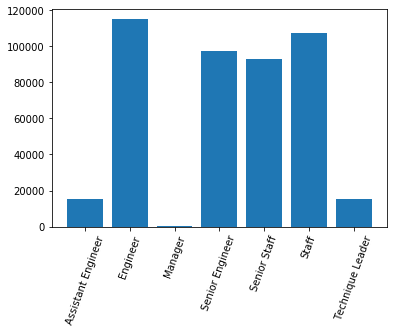

In [136]:
plt.bar(title_category,emp_by_title)
plt.xticks(rotation=70)
plt.show()

In [161]:
join_emp_title = employees.join(titles, how = 'right', lsuffix = '_emp', rsuffix = '_t')
join_emp_title

,emp_no_emp,birth_date,first_name,last_name,gender,hire_date,emp_no_t,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,Senior Staff,1996-09-12,9999-01-01
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,Senior Engineer,1990-08-05,9999-01-01
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,10007,Senior Staff,1996-02-11,9999-01-01
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,10009,Senior Engineer,1995-02-18,9999-01-01
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,10010,Engineer,1996-11-24,9999-01-01
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10012,Senior Engineer,2000-12-18,9999-01-01


In [162]:
join_emp_title.sort_values(by='emp_no_emp')

,emp_no_emp,birth_date,first_name,last_name,gender,hire_date,emp_no_t,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,10005,Senior Staff,1996-09-12,9999-01-01
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02,10006,Senior Engineer,1990-08-05,9999-01-01
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,10007,Senior Staff,1996-02-11,9999-01-01
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,10009,Senior Engineer,1995-02-18,9999-01-01
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,10010,Engineer,1996-11-24,9999-01-01
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24,10012,Senior Engineer,2000-12-18,9999-01-01


In [ ]:
# Visualize how frequently employees change titles.
thru out the time